In [ ]:
import collections
import re
import os
import numpy as np
import matplotlib.pyplot as plt

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml
import requests

In [2]:
url = "https://raw.githubusercontent.com/probml/probml-data/main/data/timemachine.txt"
response = requests.get(url)
data = response.text
lines = [s + "\n" for s in response.text.split("\n")]
raw_dataset = [re.sub("[^A-Za-z]+", " ", st).lower().split() for st in lines]

# Print first few lines
for sentence in raw_dataset[:10]:
    print(sentence)

# Concat sentences into single string of chars
#  skip blank lines
sentences = [" ".join(s) for s in raw_dataset if s]

# concat into single long string
charseq = "".join(sentences)


# Unigrams
wseq = charseq
print("First 10 unigrams\n", wseq[:10])

# Bigrams
word_pairs = [pair for pair in zip(wseq[:-1], wseq[1:])]
print("First 10 bigrams\n", word_pairs[:10])

# Trigrams
word_triples = [triple for triple in zip(wseq[:-2], wseq[1:-1], wseq[2:])]
print("First 10 trigrams\n", word_triples[:10])

# ngram statistics
counter = collections.Counter(wseq)
counter_pairs = collections.Counter(word_pairs)
counter_triples = collections.Counter(word_triples)

print("Most common unigrams\n", counter.most_common(10))
print("Most common bigrams\n", counter_pairs.most_common(10))
print("Most common trigrams\n", counter_triples.most_common(10))


# convert [(('t', 'h', 'e'), 3126), ...] to {'the': 3126, ...}
def make_dict(lst, min_count=1):
    d = dict()
    for s, c in lst:
        if c <= min_count:
            continue
        key = "".join(s)
        d[key] = c
    return d


unigram_dict = make_dict(counter.most_common())
alphabet = list(unigram_dict.keys())
alpha_size = len(alphabet)

bigram_dict = make_dict(counter_pairs.most_common())

bigram_count = np.zeros((alpha_size, alpha_size))
for k, v in bigram_dict.items():
    code0 = alphabet.index(k[0])
    code1 = alphabet.index(k[1])
    # print('code0 {}, code1 {}, k {}, v {}'.format(code0, code1, k, v))
    bigram_count[code0, code1] += v

bigram_prob = bigram_count / (1e-10 + np.sum(bigram_count, axis=1))

# https://matplotlib.org/3.1.1/gallery/specialty_plots/hinton_demo.html
def hinton_diagram(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

    ax.patch.set_facecolor("gray")
    ax.set_aspect("equal", "box")
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = "white" if w > 0 else "black"
        size = np.sqrt(np.abs(w) / max_weight)
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size, facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()
    ax.axis("on")
    ax.set_xticks(range(alpha_size))
    ax.set_xticklabels(alphabet)
    ax.set_yticks(range(alpha_size))
    ax.set_yticklabels(alphabet)

['the', 'time', 'machine', 'by', 'h', 'g', 'wells']
[]
['i']
[]
['the', 'time', 'traveller', 'for', 'so', 'it', 'will', 'be', 'convenient', 'to', 'speak', 'of', 'him', 'was', 'expounding', 'a', 'recondite', 'matter', 'to', 'us', 'his', 'grey', 'eyes', 'shone', 'and', 'twinkled', 'and', 'his', 'usually', 'pale', 'face', 'was', 'flushed', 'and', 'animated', 'the', 'fire', 'burned', 'brightly', 'and', 'the', 'soft', 'radiance', 'of', 'the', 'incandescent', 'lights', 'in', 'the', 'lilies', 'of', 'silver', 'caught', 'the', 'bubbles', 'that', 'flashed', 'and', 'passed', 'in', 'our', 'glasses', 'our', 'chairs', 'being', 'his', 'patents', 'embraced', 'and', 'caressed', 'us', 'rather', 'than', 'submitted', 'to', 'be', 'sat', 'upon', 'and', 'there', 'was', 'that', 'luxurious', 'after', 'dinner', 'atmosphere', 'when', 'thought', 'roams', 'gracefully', 'free', 'of', 'the', 'trammels', 'of', 'precision', 'and', 'he', 'put', 'it', 'to', 'us', 'in', 'this', 'way', 'marking', 'the', 'points', 'with', 

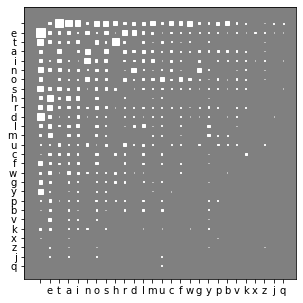

In [8]:
plt.figure(figsize=(5, 5))
hinton_diagram(bigram_count.T)
plt.savefig("bigram-count.pdf", bbox_inches="tight", pad_inches=0.1)
plt.show()

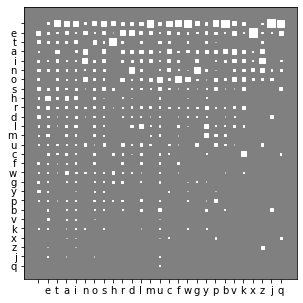

In [9]:
plt.figure(figsize=(5, 5))
hinton_diagram(bigram_prob.T)
plt.savefig("bigram-prob.pdf", bbox_inches="tight", pad_inches=0.1)
plt.show()